In [1]:
import pandas
import math
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

2025-02-01 22:41:49.892269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-01 22:41:49.917686: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-01 22:41:49.925575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-01 22:41:49.947646: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-01 22:41:51.227521: W tensorflow/compiler/tf2

In [2]:
## Get the APPLE stock data
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2020, 6, 22)
apple = yf.download('AAPL', start=start, end=end, progress=False)
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.388994,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.455581,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.593859,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.725513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.705327,394024400
...,...,...,...,...,...,...
2020-06-15,83.312500,86.419998,83.144997,85.747498,83.553566,138808800
2020-06-16,87.864998,88.300003,86.180000,88.019997,85.767937,165428800
2020-06-17,88.787498,88.849998,87.772499,87.897499,85.648575,114406400


In [3]:
print(apple.head())
print(apple.shape)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.388994  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.455581  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.593859  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.725513  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.705327  394024400
(2130, 6)


In [4]:
df_10 = pd.DataFrame()
df_10['Close'] = apple['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = apple['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = apple['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = apple['Close'].rolling(window=40).mean()

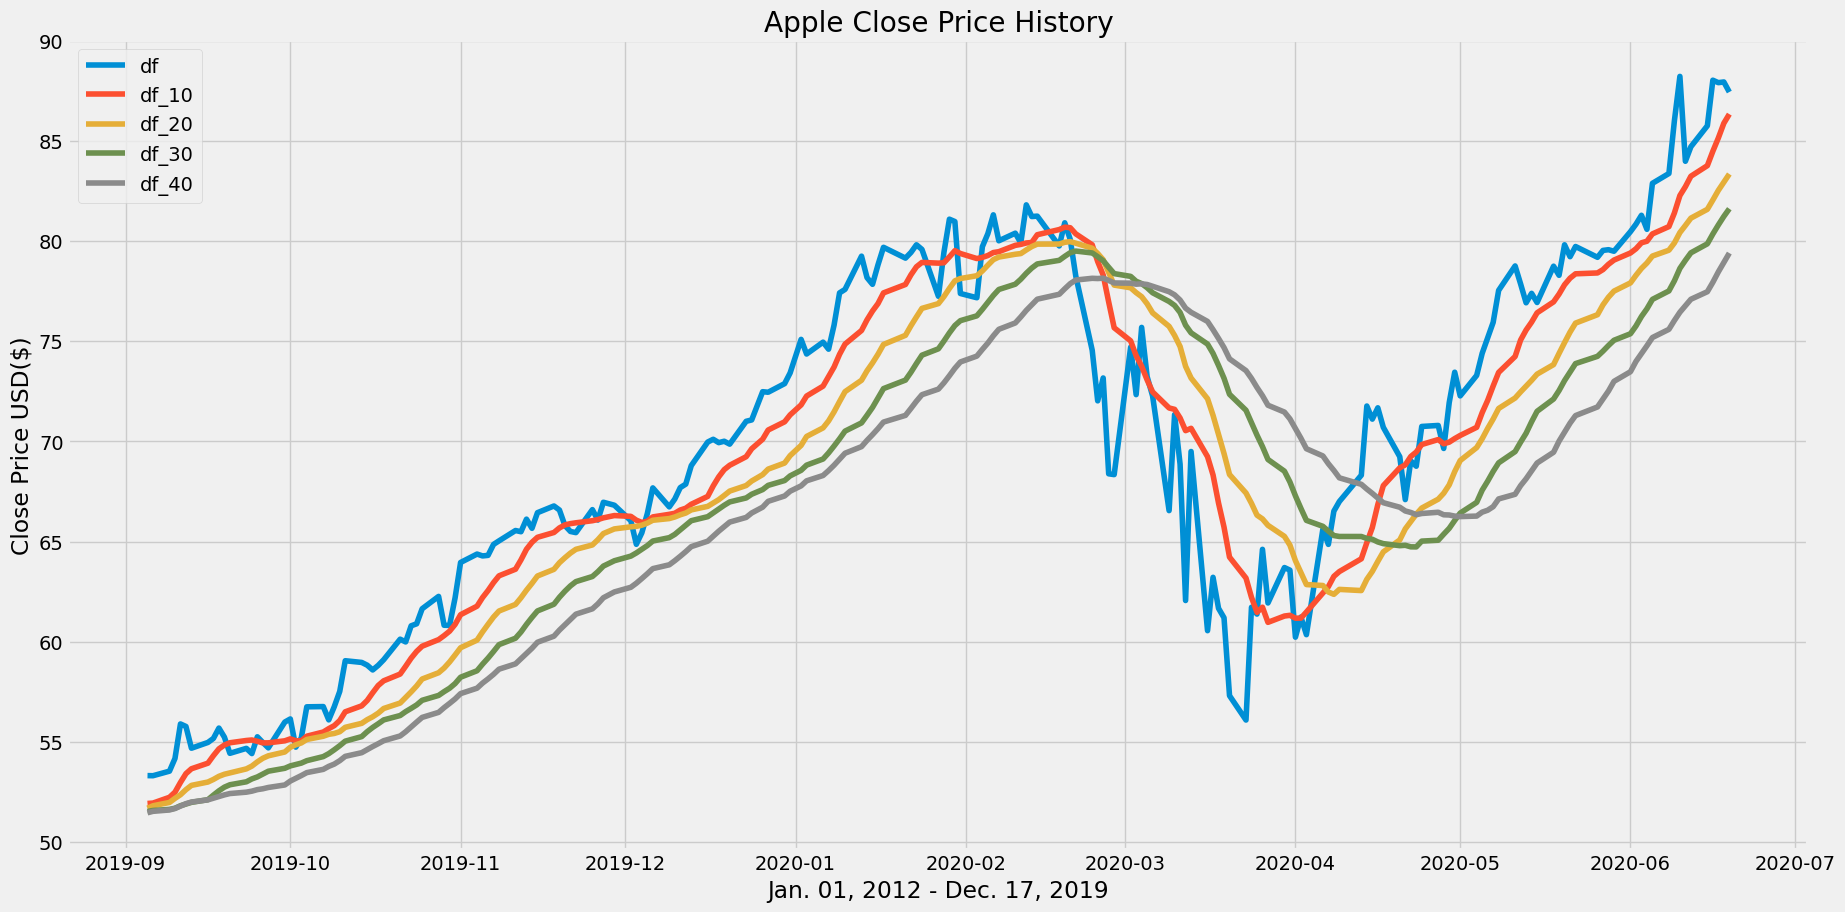

In [5]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(apple['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [6]:
# Create a new dataframe with only the 'Close column
data = apple.filter(['Close'])
data.head()

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [7]:
#Convert the dataframe to a numpy array
dataset = data.values

In [8]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1704

In [9]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.00995503],
        [0.01101786],
        [0.01322528],
        ...,
        [0.99579195],
        [0.9962633 ],
        [0.98949673]]),
 (2130, 1))

In [10]:

# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.00995503, 0.01101786, 0.01322528, 0.0153269 , 0.01500469,
       0.01573087, 0.01539904, 0.01484117, 0.01408131, 0.01643302,
       0.01855388, 0.01789982, 0.01431696, 0.01773631, 0.01436987,
       0.02699401, 0.02601775, 0.02729218, 0.03004785, 0.03171663,
       0.03157717, 0.03106259, 0.03325558, 0.03531872, 0.037656  ,
       0.04143122, 0.04936158, 0.04948181, 0.05389666, 0.05719575,
       0.05152573, 0.05370909, 0.05366581, 0.05978792, 0.05891744,
       0.06052852, 0.06342365, 0.06503475, 0.06967562, 0.07305647,
       0.07403274, 0.07437421, 0.06859356, 0.06719888, 0.06740568,
       0.07284008, 0.0743694 , 0.07765409, 0.08539688, 0.09572703,
       0.09379373, 0.09379853, 0.10126722, 0.10360451, 0.1019405 ,
       0.10042081, 0.09883858, 0.10409502, 0.10770193, 0.10921202])]
[0.10548007307678448]

[array([0.00995503, 0.01101786, 0.01322528, 0.0153269 , 0.01500469,
       0.01573087, 0.01539904, 0.01484117, 0.01408131, 0.01643302,
       0.01855388, 0.01789982, 0.01

In [11]:
#Conver the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1644, 60, 1)

In [13]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

I0000 00:00:1738467713.521898 1338182 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-02-01 22:41:53.576332: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/protim/Documents/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [15]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - loss: 8.2786e-04
Epoch 2/5
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - loss: 2.3218e-04
Epoch 3/5
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - loss: 1.7592e-04
Epoch 4/5
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - loss: 1.3656e-04
Epoch 5/5
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - loss: 1.1659e-04


In [20]:
## Create the testing data set
# Create a new array containing scaled vlues from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [21]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [22]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [24]:
print(predictions[0:5], y_test[0:5])

[[59.0546  ]
 [56.1552  ]
 [55.682896]
 [58.0235  ]
 [56.741505]] [[54.09000015]
 [53.61249924]
 [55.52750015]
 [54.34000015]
 [55.53749847]]


In [25]:
# Get the MSE & RMSE
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(4.948543683747253, 2.224532239313976)

/tmp/ipykernel_1338182/3278900560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


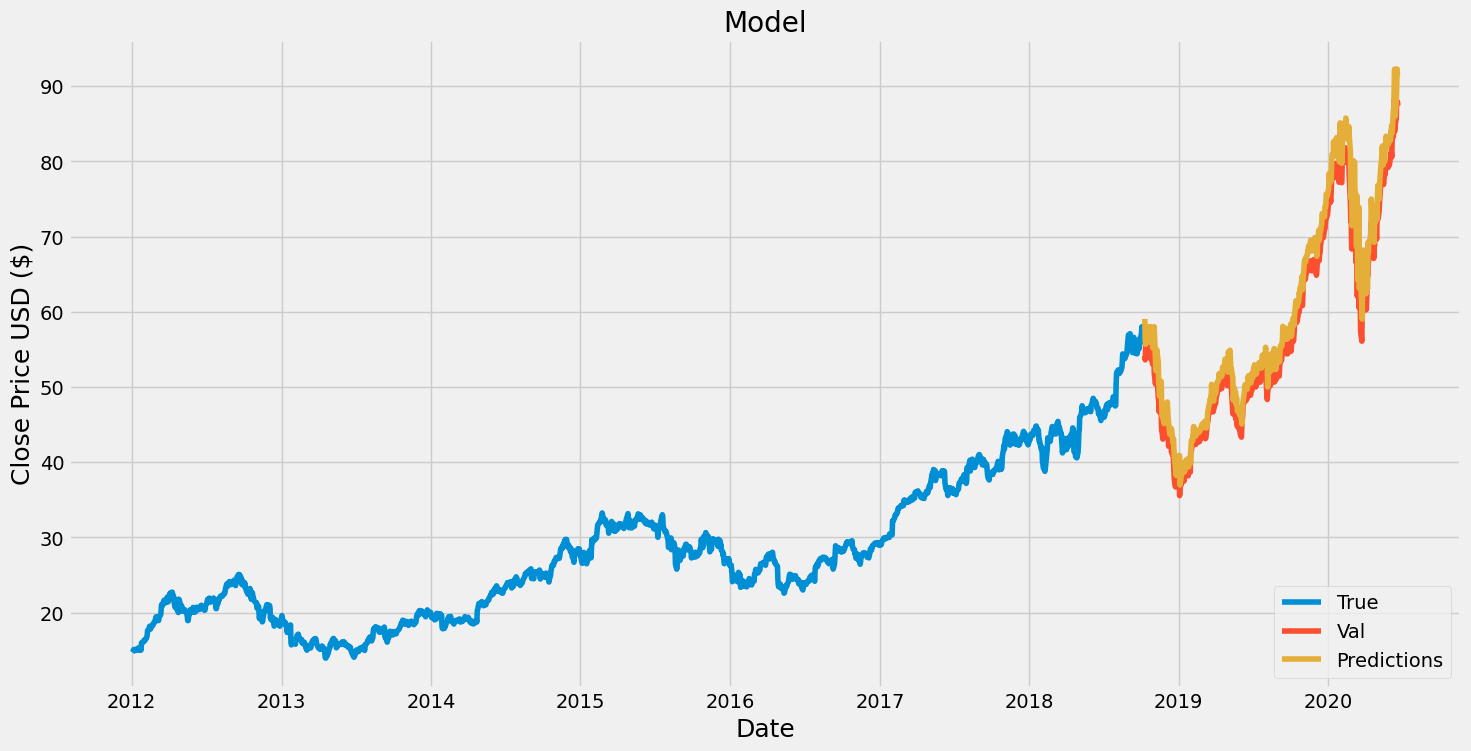

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [17]:
# Get the quote
apple_quote = yf.download('AAPL', start=start, end=end, progress=False)
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 day 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
[[90.698845]]


In [19]:
# Get the quote
apple_quote2 = yf.download('AAPL', start='2019-12-18', end='2019-12-19', progress=False)
apple_quote2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-18,69.949997,70.474998,69.779999,69.934998,67.800766,116028400
